# Ice albedo feedback in the 0D energy balance model


Consider the globally averaged energy balance equation for a planet whose surface temperature is $T_s$, this time no equilibrium is assumed, so the difference between the incoming and outgoing radiation leads to a temperature tendancy:
 
 \begin{equation}
  C \frac{dT_s}{dt} = \frac{S_0}{4} [ 1 - \alpha(T_s)]  - \epsilon_e \sigma T_s^4
  \end{equation}
 
where $C$ is the heat capacity of our system, related mainly to the deep ocean (we come back to this later), and $\epsilon_e$ is the effective emissivity of the Earth (refer to lecture notes). 
 
Here the albedo of the planet $\alpha$ is now a function of global mean temperature rather than a fixed constant.  
Why is this?  Well, this is to mimic the feedback due to ice (although of course one could also try to represent other temperature sensitive albedo feedbacks such as land-surface cover, difficult to do in such a simple model).  

As the temperature cools, more of the planet is assumed to be below the threshold for ice cover, increasing the global mean albedo.  This is represented by the following function:  

 \begin{equation}
  \alpha = 0.45 - 0.25 \,\mathrm{tanh} \left( \frac{(T-272)}{23} \right)
  \end{equation}
 
 Note that we don't actually know what the ice cover is in this model, we only know the final impact on albedo. Takes take a look at this function by plotting it.


Text(0, 0.5, 'Albedo')

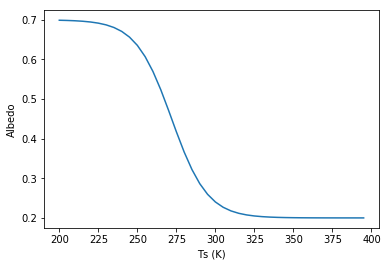

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# function to calculate alfa
def alfa(T):
    """ function for albedo"""
    albedo=0.45-0.25*np.tanh((T-272)/23)
    return albedo 

# vector of surface temperatures
Ts=np.arange(200,400,5)

# vector of albedos
fig,ax=plt.subplots()
alfa=alfa(T)
ax.plot(Ts,alfa)
ax.set_xlabel("Ts (K)")
ax.set_ylabel("Albedo")

So we can see that for temperatures exceeding 300K roughly, the Earth becomes ice-free and the albedo tends to a fixed values of about 0.2.  As temperature cools the ice edge moves to the south, until for conditions below Ts=225K most of the globe is frozen and the albedo tends to 0.7.  

So now, rather than solve the equation, we are simply going to plot the RHS to get the sign of DT/Dt


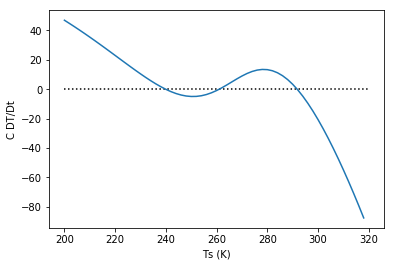

In [80]:
import matplotlib.pyplot as plt
import numpy as np


def alfa(T):
    """ function for albedo"""
    albedo=0.45-0.25*np.tanh((T-268)/23)
    return albedo 

# constants needed
sigma=5.67e-8
eps=0.62 # 1-eps/2

# define the solar constant array
S0=1370 
Ts=np.arange(200,320,2)

DTdt=S0*(1-alfa(Ts))/4 - eps*sigma*Ts**4

fig,ax=plt.subplots()
ax.plot(Ts,DTdt)
ax.set_xlabel("Ts (K)")
ax.set_ylabel("C DT/Dt")
ax.hlines(0,200,320,linestyles="dotted")

|**question 1: Where are the three equilibria temperatures and are they stable or unstable?**

When you have discussed this, we will go on to plot a contour plot of $C \frac{DT}{Dt}$ for a range of values for S0 and Ts. 


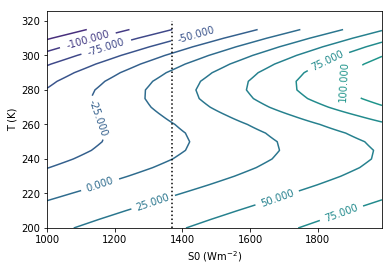

In [81]:
import matplotlib.pyplot as plt
import numpy as np

def alfa(T):
    """function to calculate albedo"""
    albedo=0.45-0.25*np.tanh((T-268)/23)
    return albedo 

eps=0.62
sigma=5.67e-8


# define the solar constant array
S0today=1370
S0=np.arange(1000,2000,10)
Ts=np.arange(200,320,5)

T2d=np.tile(Ts,(len(S0),1)).transpose()
S2d=np.tile(S0,(len(Ts),1))
DTdt=S2d*(1-alfa(T2d))/4 - eps*sigma*T2d**4

fig,ax=plt.subplots()
X=ax.contour(S0,Ts,DTdt,levels=np.arange(-200,400,25))
ax.clabel(X,fontsize=10)
ax.set_xlabel("S0 (Wm$^{-2}$)")
ax.set_ylabel("T (K)")
ax.vlines(S0today,200,320,linestyles="dotted")

**Question 2: What happens to temperature if you reduce S0 from the present day value to 1000 Wm$^{-2}$?  If you then increase S0 to 1600 W m$^{-2}$, what happens?  Does the temperature trace the same path?**


  # Adding water vapor feedback
  
  We return to the energy balance equation but this time write the OLR term as a function of the atmospheric emissivity:
  
  \begin{equation}
  C \frac{dT}{dt} = \frac{S_0}{4} [ 1 - \alpha(T)]  - (1-\epsilon /2) \sigma T^4
  \end{equation}
 
 The atmospheric emissivity is related to the optical depth by Beer-Lambert law:
 
 \begin{equation}
  \epsilon = 1-e^{-\tau}
  \end{equation}
  
 and we will specify the optical depth as a temperature-dependent function that represents the increase of water vapor specific humidity with temperature added to a constant value that represents the effects of clouds and other greenhouse gases:
 
 \begin{equation}
  \tau = 0.56 + 0.07 \exp \big [ - \frac{L_v}{R_v}  \big( \frac{1}{T} - \frac{1}{288} \big ) \big ] 
  \end{equation}

 $\tau(T)$ includes a part that is constant (greenhouse gases and clouds) and a variable part that is proportional to water vapor pressure.  Remember that $R_v = 461.5$ J kg$^{-1}$ K$^{-1}$ and $L_v = 2.5 \times 10^6$ J kg$^{-1}$.

Text(0, 0.5, 'Tau')

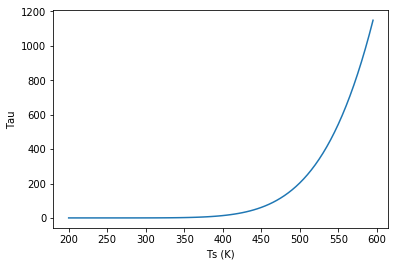

In [84]:
import matplotlib.pyplot as plt
import numpy as np


def tau(T):
    tau=0.56+0.07*np.exp(-Lv*(1/T-1/288)/Rv)
    return tau

# vector of surface temperatures
Ts=np.arange(200,600,5)

# vector of albedos
fig,ax=plt.subplots()

ax.plot(Ts,tau(Ts))
ax.set_xlabel("Ts (K)")
ax.set_ylabel("Tau")



Text(0, 0.5, 'T (K)')

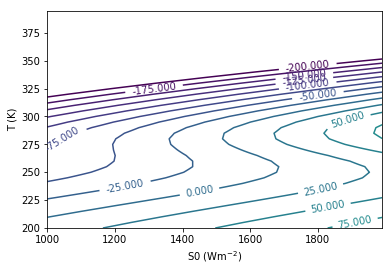

In [86]:
import matplotlib.pyplot as plt
import numpy as np

Lv=2.5e6
Rv=461.5
sigma=5.67e-8

def alfa(T):
    albedo=0.45-0.25*np.tanh((T-272)/23)

    return albedo 

def tau(T):
    #tau=0.56+0.07*np.exp(-Lv/Rv*(1/T-1/288))
    tau=0.63
    return tau

# define the solar constant array
S0=np.arange(1000,2000,10)
Ts=np.arange(200,400,5)

T2d=np.tile(Ts,(len(S0),1)).transpose()
S2d=np.tile(S0,(len(Ts),1))

DTdt=S2d*(1-alfa(T2d))/4 - 0.69*sigma*T2d**4 #/(1+tau(T2d))

fig,ax=plt.subplots()
X=ax.contour(S0,T,DTdt,levels=np.arange(-200,400,25))
ax.clabel(X,fontsize=10)
ax.set_xlabel("S0 (Wm$^{-2}$)")
ax.set_ylabel("T (K)")